# Completeness relation: an introduction

One of the main interest of using the Siegert states in solving quantum mechanical problems is that they form a complete basis set made of discrete states only (you may think of it as a generalization of the quantized bound states), that may suitably replace the cumbersome continuum of unocciped states usually studied.

The simplest way of observing that is by comparing the following exact completeness relation (CR), that involved the bound (subscript $b$) and the continuum states of the 1D SWP (subscript $p$):
                
$\text{CR}(k) = \text{CR}(k) = \sum_b \frac{\left\langle g|\varphi_b\right\rangle^2}{\left\langle g | g \right\rangle} + 
                \sum_{p=\pm} \int_0^k \text{d} k_1 \frac{\left\langle g |\varphi_p\right\rangle \left\langle \varphi_p | g\right\rangle}{\left\langle g | g \right\rangle}$

to the one approximated by the so-called Mittag-Leffler Expansion (MLE):

$CR_{MLE}(k) = \frac{1}{2} \sum_{S=a,b} \frac{\left( g | \varphi_S \right)^2}{ \left\langle g | g \right\rangle } + 
               \frac{1}{2} \sum_{S=c,d}^{|k_S| \leq |k|} \frac{\left( g | \varphi_S \right)^2}{ \left\langle g | g \right\rangle }$
               
where $g$ is a test function, $\varphi_S$ is a Siegert state (where the subscripts $a$, $b$, $c$, $d$ stand for anti-bound, bound, resonant, anti-resonant) of wavenumber $k_S$ and $\varphi_p$ is a continuum state (where the subscripts + and - stand for even and odd continuum states) of wavenumber $k_1$. 

The exact CR is a continuous function of $k$, while the MLE of the CR is evaluated at discrete values of $k$, being the absolute values of the resonant/anti-resonant wavenumbers (and k=0 to get the bound/anti-bound contribution to the MLE of the CR).

This comparison will be performed here in the case of the 1D Square-Well Potential (1DSWP).

**To perform such a study, one has to:**

* Define a 1D SW potential,

* Create two basis sets: one made of Siegerts states only, the other made of continuum and bound states

* Define a test function, which can be a rectangular function or a Gaussian function

* Perform the exact evaluation of the CR and the approximated Mittag-Leffler expansion (MLE) of the CR, and compare them.

## Initialization: find continuum and Siegert states

Before studying the completeness relation, we need to create two basis sets: one made of Siegert states only, the other made of bound and continuum states.

### Import useful modules and classes

In [1]:
# Make the notebook aware of some classes of the SiegPy module
from siegpy import SWPotential, SWPBasisSet, Rectangular, Gaussian
# Other imports
import numpy as np
import matplotlib.pyplot as plt

### Define a 1D Square-Well Potential.

A 1D SW potential is caracterized by its width *l* and depth *V0*.

In [2]:
V0 = 10  # Depth of the potential
l = np.sqrt(2) * np.pi  # Width of the potential
potential = SWPotential(l, V0)

### Create a basis-set made of Siegert states only.

The search of the wavenumbers of the Siegert states is limited to a certain part of the complex wavenumber plane. Here, the absolute value of the real part (resp. imaginary part) of the Siegert wavenumbers must not exceed `re_kmax` (resp. `im_kmax`).

To find the wavenumbers, one has to define a grid of input-guess, made of complex wavenumbers. This grid is defined by a grid step on the real axis `re_hk` and an optional one on the imaginary axis `im_hk`. The search of the bound and anti bound states on the imaginary axis is carried out automatically (given that the number of states on this axis and the range over which they are to be found is defined by the depth and width of the potential).

In [3]:
re_kmax = 20.
im_kmax = 3.
re_hk = 1.
im_hk = 2.
siegerts = SWPBasisSet.find_Siegert_states(potential, re_kmax, re_hk,
                                           im_kmax, im_hk=im_hk, analytic=True)

### Create an exact basis-set, made of bound and continuum states.

The bound states can be taken from the previous calculation finding the Siegert states (given that bound states are nothing but a particuliar type of Siegert states), while the continuum states are discretized over a grid of real wavenumbers. This grid is caracterized by the grid step `h_k` and the maximal wavenumber `k_max`.

In [4]:
# Find the continuum states
hk = 0.01   # Grid step for the continuum states wavenumbers
kmax = 20.  # Maximal wavenumber of the continuum state to find.
continuum = SWPBasisSet.find_continuum_states(potential, kmax, hk)

In [5]:
# Create the exact basis set
exact = siegerts.bounds + continuum

### Define test functions to evaluate the completeness relation.

The completeness relation is evaluated using a test function $g$. For the MLE of the CR to hold, the test function must lie in region $II$ (inside the potential, where $|x| \leq l/2$). 

Two types of test functions are implemented to yield analytical scalar product with the Siegert and continuum states of the 1D SWP:

* the rectangular function (`Rectangular` class), that can obviously lie exactly within region $II$.

* the Gaussian function (`Gaussian` class), that lies inside region $II$ only approximately, when its $\sigma$ is small enough so that it may be safely considered as 0 outside of region $II$.

In [6]:
xc = 0.0      # Center of the test functions
h = 3.0       # Amplitude of the test functions
a = l/8.      # Width of the rectangular function
sigma = l/20. # Width of the Gaussian
gauss = Gaussian(sigma, xc, h=h)  # Gaussian test function
rect = Rectangular.from_width_and_center(a, xc, h=h)   # Rectangular test function

## Computation of the completeness relation

The computation of the completeness relation can be performed "exactly" (*i.e.* analytically with a discretized grid of continuum states) or approximately using the MLE, for Gaussian or rectangular test functions, .

### Case 1: Gaussian test function

#### Compute the conversion of the completeness relation as a function of the number of states included

* The convergence of the MLE of the CR as a function of the number of the resonant couples included in the completeness relation is computed thanks to the `MLE_completeness_convergence` method applied to the basis set made of Siegert states. This method returns the grid of wavenumbers and the convergence of the CR as a tuple.

* The convergence of the exact CR as a function of the number of continuum states included in the completeness relation is computed thanks to the `exact_completeness_convergence` method applied to the exact basis set made of bound and continuum states. This method also returns the grid of wavenumbers and the convergence of the CR as a tuple.

In [7]:
k_MLE_g, CR_MLE_gauss = siegerts.MLE_completeness_convergence(gauss)
k_exa_g, CR_exact_gauss = exact.exact_completeness_convergence(gauss)

#### Compare both convergences

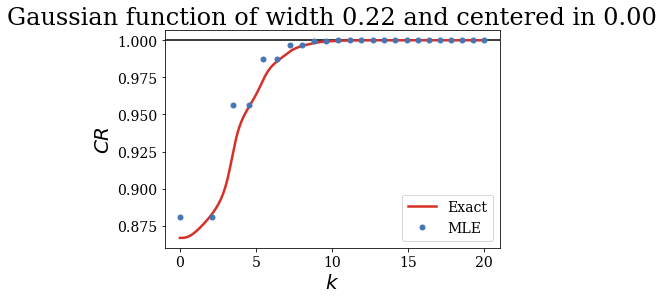

In [8]:
#plt.axhline(0, color='black')
plt.axhline(1, color='black', lw=1.5)
plt.plot(k_exa_g, np.real(CR_exact_gauss), color='#d73027', label='Exact')
plt.plot(k_MLE_g, np.real(CR_MLE_gauss), color='#4575b4', label='MLE', 
         ls='', marker='.', ms=10)
plt.xlabel("$k$")
plt.ylabel("$CR$")
plt.legend()
plt.savefig('CR_gauss.pdf')
plt.title(repr(gauss))
plt.show()

The exact completeness relation tend to 1, and so does the approximated MLE of the CR, that closely follows the exact result. This shows that finding the resonant states up to a certain absolute value of the wavenumber (or energy) is equivalent to finding the continuum states up to a certain wavenumber (or energy). **Only a few Siegert states are sufficient to reproduce the influence of a continuum of eigenstates on the completeness relation.**

Note that half of the resonant couples have a zero influence on the completeness relation. This is explained by the parity of the corresponding states: the Gaussian function is even (because it is centered in 0), so the scalar product with the odd Siegert states is obviously equal to zero. You would also see that the continuum contribution to the CR is only due to the even continuum states.

### Case 2: Rectangular test function.

You could have actually obtained the same plot by using a single line (and without needing to compute the exact basis set made of continuum beforehand) by applying the `plot_completeness_convergence` method to the Siegert states basis set. If the basis set does not contain any continuum states, then a basis set of continuum states is created. If the optional parameters `hk` and `nres` are not specified, then default values are used. Another important option is that you can provide an output filename in order to save the plot, via the `file_save` optional argument. We present these funtionalities with the rectangular test function defined earlier:

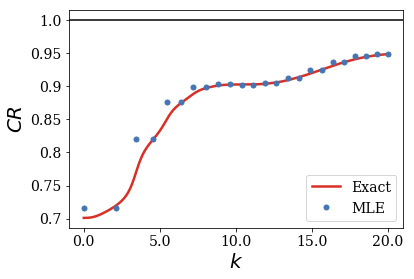

In [9]:
siegerts.plot_completeness_convergence(rect, file_save='CR_rect.pdf')

As you can see, the exact completeness relation also tends to one, however more slowly than in the case of the Gaussian test function. This is explained by the dicontinuities of the rectangular function, that are more difficult to represent using the basis sets made of continuous wavefunctions (*e.g.* those of the continuum and of the Siegert states).

Another optional argument of the `plot_completeness_convergence` method is `nres`, which enables to choose the number of resonant states used to perform the convergence:

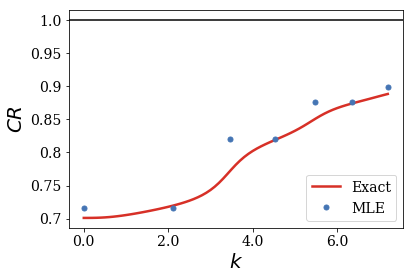

In [10]:
siegerts.plot_completeness_convergence(rect, nres=6)

This concludes this notebook! By now, you should be able to test the convergence of the completeness relation for any Gaussian and rectangular test functions using the `Gaussian` and `Rectangular` class. 

You also learned that the Mittag-Leffler expansion is the natural expansion that uses Siegert states instead of continuum states in the completeness relation, so that a discrete basis set can accurately reproduce the result of the cumbersome continuum of states of positive energy. 

Still, we only studied cases where the convergence of the completeness relation with Siegert states is closely related to the exact result obtained with continuum states. The next notebook will show that there are indeed some problematic cases...